# Model Training

## Importing the Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# for machine learning 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.chdir("D:/All_the_Documents/Machine Learning Content/My_programs_VS_code/KN_machine_learning_projects")
df = pd.read_csv("notebook/data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing the Targets and Labels

In [4]:
X = df.drop(columns=['math_score'], axis= 1)
y = df['math_score']


In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
# getting the categorical and num features here
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [7]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [8]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()


preprocessor = ColumnTransformer(
    [
        ('StandardScalar', numeric_transformer, num_features),
        ('OneHotEncoder', oh_transformer, cat_features),
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1000, 19)

### Train and Test Split 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42 )

In [13]:
X_train

array([[ 0.05694554,  0.45733301,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.94779033,  0.98406266,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.35894946,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49126664, -0.99117351,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.45063795, -0.99117351,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4960025 ,  1.37910989,  1.        , ...,  1.        ,
         0.        ,  1.        ]])

### Creating a function to evaluate the Model's performance

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)

    return (mae, rmse, r2)

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_score_list = []

for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_predict_train)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_predict_test)


    model_list.append(list(models.keys())[i])
    r2_score_list.append(model_test_r2)
    

    

In [17]:
pd.DataFrame(list(zip(model_list, r2_score_list)), columns=['Model', 'R2_Score']).sort_values(by=['R2_Score'], ascending= False)

,Model,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880223
5,Random Forest Regressor,0.853849
7,AdaBoost Regressor,0.846615
1,Lasso,0.825320
6,XGBRegressor,0.821220
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.754170


### Conclusion:
- here Ridge and Linear Regression have the highest Accuracy 
- But, we are choosing the Linear Regression

In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

 
y_predict = lin_model.predict(X_test)

print(f'The Accuracy of the Linear Model is : {r2_score(y_test, y_predict)* 100}')

The Accuracy of the Linear Model is : 88.02228827414312


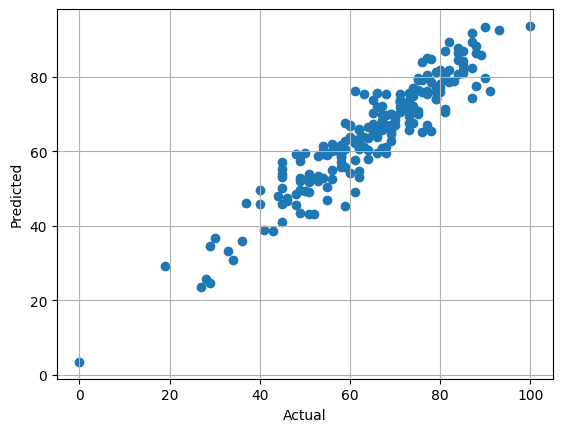

In [19]:
plt.scatter(y_test, y_predict)
plt.xlabel('Actual');
plt.ylabel('Predicted')
plt.grid()
plt.show()

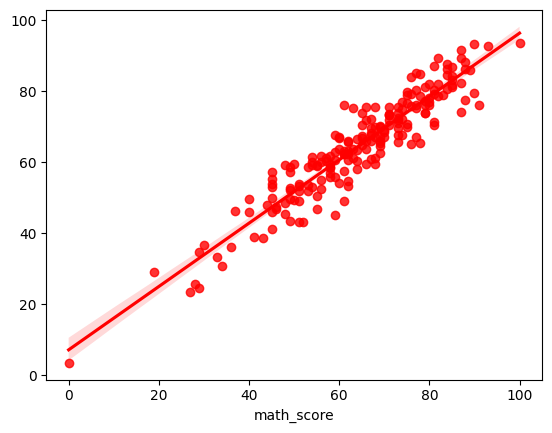

In [20]:
sns.regplot(x = y_test, y = y_predict, color = 'red')
plt.show()

### Difference Between the Acutal values and Predicted values

In [21]:
pd.DataFrame({"Actual Value": y_test, "Predicted Value": y_predict, "Difference": y_test - y_predict})

,Actual Value,Predicted Value,Difference
521,91,76.28125,14.71875
737,53,58.81250,-5.81250
740,80,77.12500,2.87500
660,74,76.93750,-2.93750
411,84,87.75000,-3.75000
...,...,...,...
408,52,43.21875,8.78125
332,62,62.28125,-0.28125
208,74,67.68750,6.31250
613,65,66.90625,-1.90625


In [22]:
# random_cv = RandomizedSearchCV(estimator= lin_modelm, cv= 5, scoring= 'accuracy')
# here we don't use the huperparameter tuning, it is used in the form ridge, Lasso and Elastic
# that's why we will avoid it here.

### Conclusion:
- We have figure the best suited model for our Use.